In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [85]:
df.drop(columns="Unnamed: 0",inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


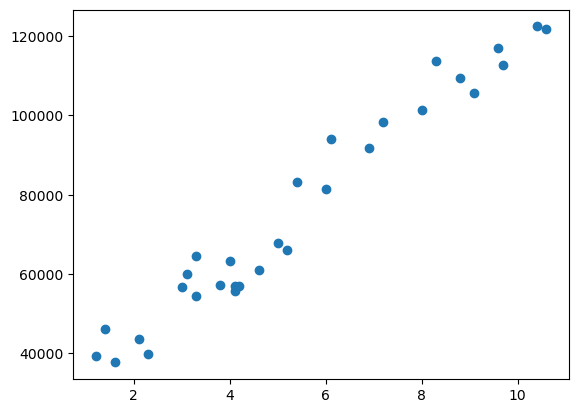

In [87]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [88]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [89]:
X = df[["YearsExperience"]]
y = df.iloc[:,1]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [91]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [92]:
type(X_train)

pandas.core.frame.DataFrame

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
x_train_scaled = scaler.fit_transform(X_train)

In [96]:
x_train_scaled

array([[-0.56544538],
       [ 0.43595407],
       [-0.63450742],
       [ 1.71360166],
       [-0.91075554],
       [ 1.09204338],
       [ 1.3682915 ],
       [ 0.9193883 ],
       [ 0.81579525],
       [-0.22013523],
       [-1.4632518 ],
       [-0.53091437],
       [ 0.12517493],
       [-1.22153469],
       [ 1.64453963],
       [-0.35825929],
       [-1.39418976],
       [ 1.40282252],
       [ 0.15970595],
       [-0.15107319],
       [ 0.53954712],
       [-0.08201116],
       [-1.53231383],
       [-1.15247265]])

In [97]:
x_test_scaled = scaler.transform(X_test)
x_test_scaled

array([[ 1.19563642],
       [-0.53091437],
       [-0.49638335],
       [-0.87622453],
       [-0.8071625 ],
       [-0.8071625 ]])

In [98]:
# model building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [99]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

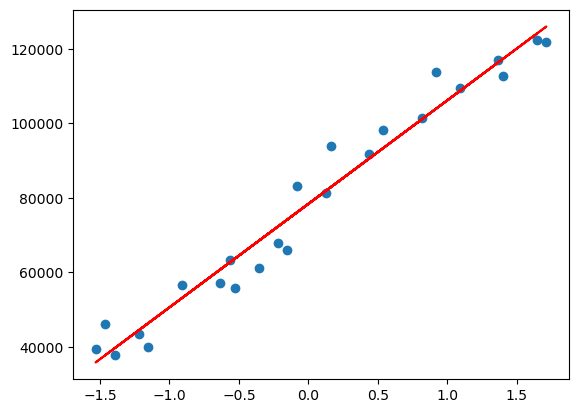

In [100]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled,model.predict(x_train_scaled),color="red")
# plt.plot(y_train-model.predict(x_train_scaled))

In [101]:
y_pred = model.predict(x_test_scaled)

In [114]:
y_pred

array([111604.57354838,  63646.94628237,  64606.09882769,  54055.42082917,
        55973.72591981,  55973.72591981])

In [102]:
print(model.intercept_)
print(model.coef_)


78393.91666666667
[27776.55166326]


In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
print("r2",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 0.8688045158887867
mse 41480478.923269436
mae 6055.032971544776
rmse 6440.534055749526


In [105]:
# for the testing purpose

intercept = model.intercept_
coef = model.coef_


In [111]:
import statsmodels.api as sm

In [112]:
model2 = sm.OLS(y_train,x_train_scaled).fit()

In [113]:
y_pred2 = model.predict(x_test_scaled)
y_pred2

array([111604.57354838,  63646.94628237,  64606.09882769,  54055.42082917,
        55973.72591981,  55973.72591981])

In [115]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              2.874
Date:                Wed, 22 Jan 2025   Prob (F-statistic):                       0.104
Time:                        22:23:51   Log-Likelihood:                         -304.58
No. Observations:                  24   AIC:                                      611.2
Df Residuals:                      23   BIC:                                      612.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.778e+04   1.64e+04      1.695      0.104   -6117.916    6.17e+04
==============================================================================
Omnibus:                        1.091   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                1.044
Skew:                           0.394   Prob(JB):                        0.593
Kurtosis:                       2.350   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""